## The HIST.nc file

The `HIST.nc` file is contains the history of structural relaxations or molecular dynamics calculations.
One can use the `abiopen` function provide by `abilab` to open the file and generate an instance of `HistFile`.
Alteratively, one can use the `abiopen.py` script to open the file inside the shell with the syntax:

    abiopen.py <filename_HIST.nc> 
    
This command will start the ipython interpreter so that one can interact directly with the `HistFile` object (named 
`abifile` inside ipython).

In [23]:
from __future__ import print_function
%matplotlib inline

from abipy import abilab
from abipy.abilab import abiopen, Structure

In [4]:
hist = abiopen("out_HIST.nc")

print("Number of iterations performed:", hist.num_steps)

Number of iterations performed: 3


`hist.structures` is the list of structure objects at the different iteration steps.
`hist.etotals` is a numpy array with the total energies in eV associated to the different steps.

In [21]:
for struct, etot in zip(hist.structures, hist.etotals):
    print("Volume:", struct.volume,", Etotal:", etot)

Volume: 40.8882917934 , Etotal: -238.616156793
Volume: 40.8882917934 , Etotal: -238.617231344
Volume: 40.8882917934 , Etotal: -238.618032243


`Structure.from_file` reads and returns the last structure stored in the `HIST.nc` file:

In [24]:
Structure.from_file(hist.filepath) == hist.structures[-1]

True

To plot the evolution of the structural parameters with `matplotlib`:

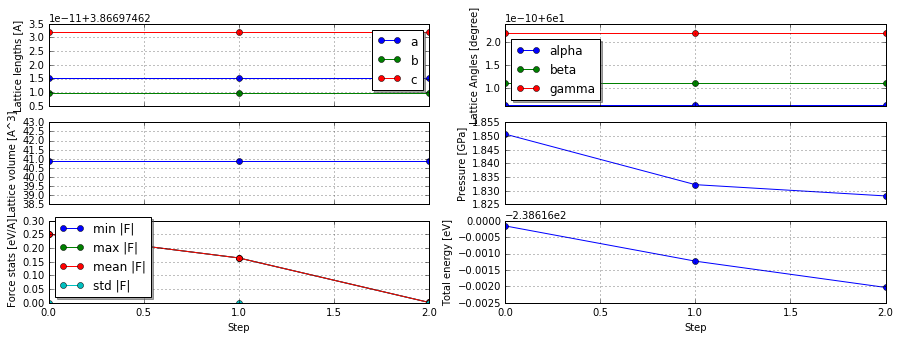

In [17]:
hist.plot(size_kwargs=dict(w=15, h=5)); # w and h specify the height and the width of the figure

To plot the total energies at the different iterations steps:

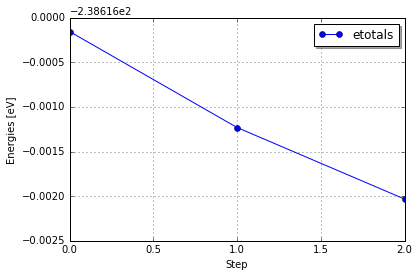

In [20]:
hist.plot_energies();